from https://book.stat420.org/collinearity.html

In [1]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [3]:
gen_exact_collin_data = function(num_samples = 100) {
  x1 = rnorm(n = num_samples, mean = 80, sd = 10)
  x2 = rnorm(n = num_samples, mean = 70, sd = 5)
  x3 = 2 * x1 + 4 * x2 + 3
  y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1)
  data.frame(y, x1, x2, x3)
}

In [4]:
set.seed(42)
exact_collin_data = gen_exact_collin_data()
head(exact_collin_data)

,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,170.7135,93.70958,76.00483,494.4385
2,152.9106,74.35302,75.22376,452.6011
3,152.7866,83.63128,64.98396,430.1984
4,170.6306,86.32863,79.24241,492.6269
5,152.3320,84.04268,66.66613,437.7499
6,151.3155,78.93875,70.52757,442.9878


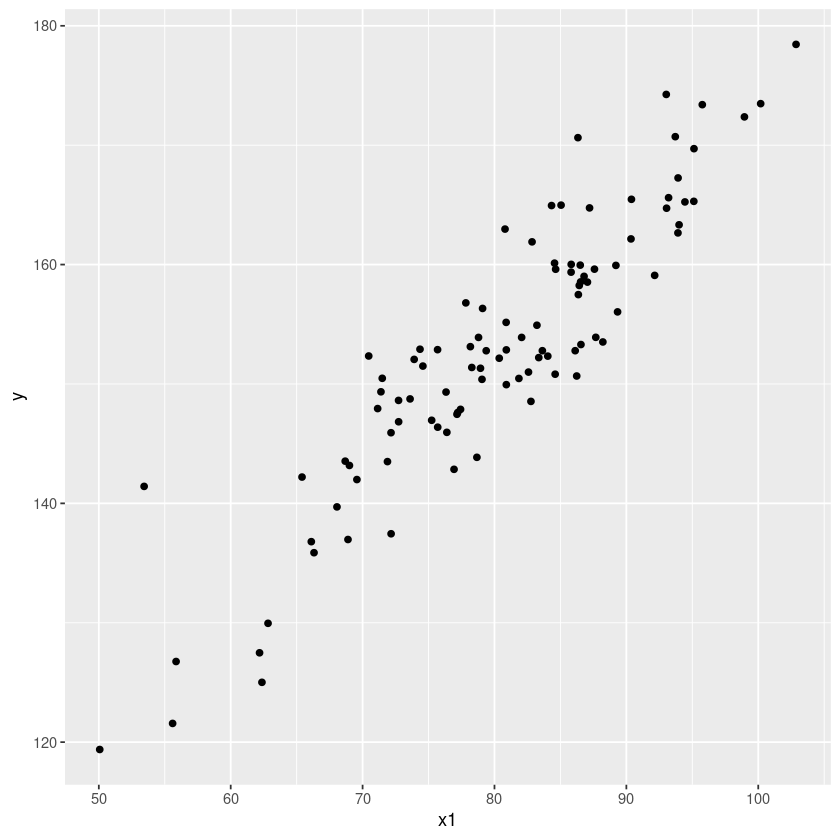

In [5]:
exact_collin_data %>%
    ggplot(aes(x=x1, y=y)) + 
    geom_point()

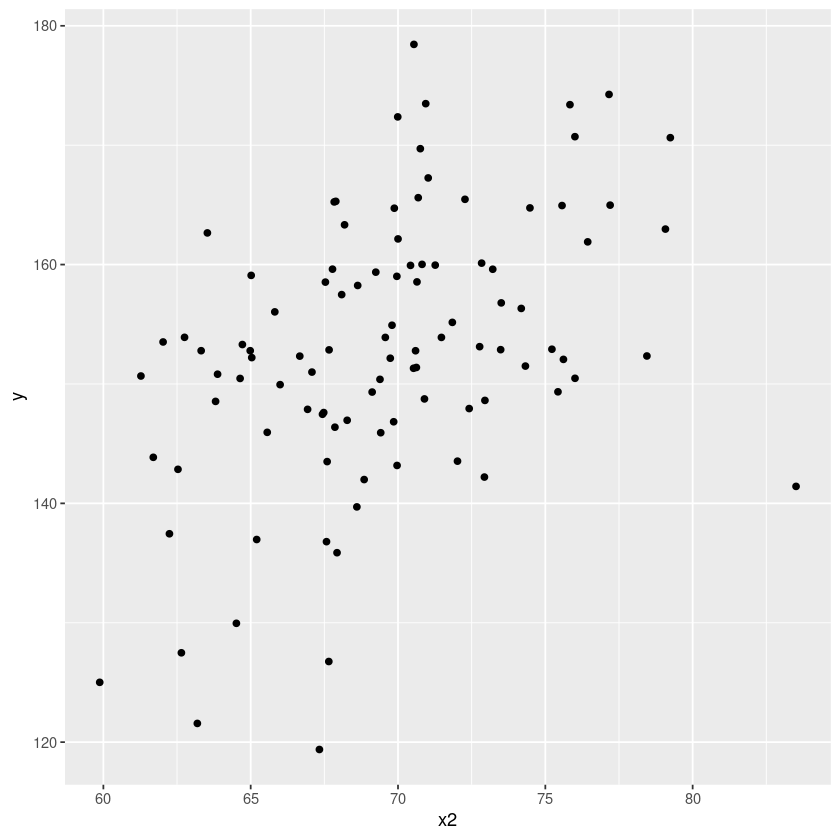

In [6]:
exact_collin_data %>%
    ggplot(aes(x=x2, y=y)) + 
    geom_point()

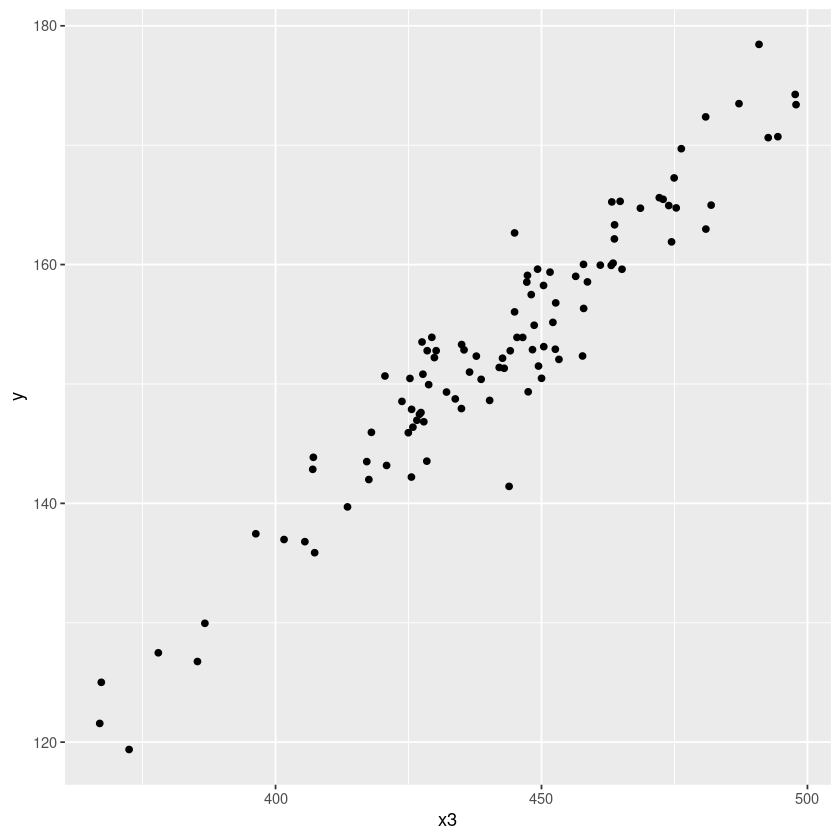

In [7]:
exact_collin_data %>%
    ggplot(aes(x=x3, y=y)) + 
    geom_point()

In [11]:
exact_collin_fit = lm(y ~ x1 + x2 + x3, data = exact_collin_data)
summary(exact_collin_fit)


Call:
lm(formula = y ~ x1 + x2 + x3, data = exact_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.957336   1.735165   1.704   0.0915 .  
x1          0.985629   0.009788 100.702   <2e-16 ***
x2          1.017059   0.022545  45.112   <2e-16 ***
x3                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


In [7]:
exact_collin_fit = lm(y ~ x1 + x2, data = exact_collin_data)
summary(exact_collin_fit)


Call:
lm(formula = y ~ x1 + x2, data = exact_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.957336   1.735165   1.704   0.0915 .  
x1          0.985629   0.009788 100.702   <2e-16 ***
x2          1.017059   0.022545  45.112   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


In [8]:
exact_collin_fit = lm(y ~ x1 + x3, data = exact_collin_data)
summary(exact_collin_fit)


Call:
lm(formula = y ~ x1 + x3, data = exact_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.194542   1.750225   1.254    0.213    
x1          0.477100   0.015158  31.475   <2e-16 ***
x3          0.254265   0.005636  45.112   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


In [9]:
exact_collin_fit = lm(y ~ x2 + x3, data = exact_collin_data)
summary(exact_collin_fit)


Call:
lm(formula = y ~ x2 + x3, data = exact_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.478892   1.741452   0.849    0.398    
x2          -0.954200   0.030316 -31.475   <2e-16 ***
x3           0.492815   0.004894 100.702   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16
